## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [0]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2


def build_mlp(input_shape, out_shape = 10, num_neurons=[1024,512,256,128],drp_ratio=0.2,l1_ratio=1e-04):
    input_layer = keras.layers.Input(input_shape)
    for i, num_n in enumerate(num_neurons):
      if i==0:
        x= keras.layers.Dense(units=num_n, activation = 'relu', name = 'hiden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(input_layer)
        x=BatchNormalization()(x)
        x= Dropout(drp_ratio)(x)
      else:
        x= keras.layers.Dense(units=num_n, activation = 'relu', name = 'hiden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(x)
        x=BatchNormalization()(x)
        x= Dropout(drp_ratio)(x)
      out = keras.layers.Dense(units=out_shape, activation = 'softmax', name='out')(x)
      model = keras.models.Model(inputs=[input_layer], outputs=[out])
    """Code Here
    建立你的神經網路
    """
    return model

In [0]:
"""Code Here
設定超參數
"""
LearningRate = 0.001
Epochs = 50
Batch_size = [1024, 512, 256]
drp_ration = 0.2
MOMENTUM = 0.9
l1_ratio =1e-04

In [36]:
results = {}
for Bs in Batch_size:
  keras.backend.clear_session()
  print("Experiment with BATCH_SIZE = %.6f" % (Bs))
  model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ration, l1_ratio=l1_ratio)
  model.summary()
  optimizer=keras.optimizers.SGD(lr=LearningRate,nesterov=True,momentum=MOMENTUM)
  model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
  
  model.fit(x_train, y_train, 
           epochs=Epochs,
           batch_size=Bs, 
           validation_data=(x_test, y_test), 
           shuffle=True)
  ## collect data##
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = "exp%.6f" % (Bs)
  results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
  
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

Experiment with BATCH_SIZE = 1024.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hiden_layer2 (Dense)         (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None,

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

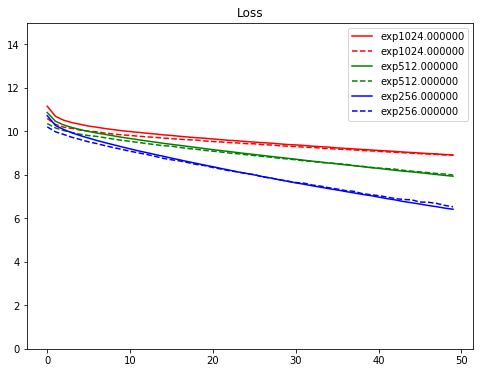

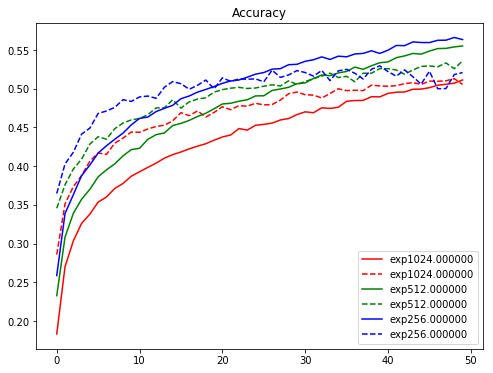

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 15])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

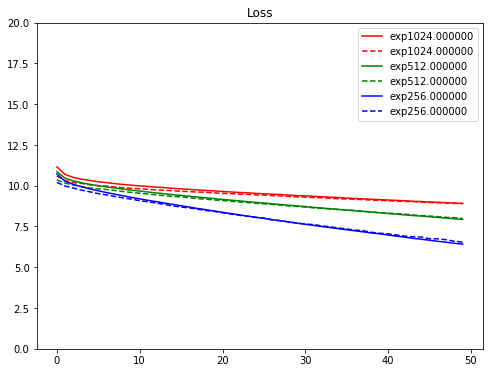

In [48]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 20])
plt.legend()
plt.show()

In [43]:
results.keys()

dict_keys(['exp1024.000000', 'exp512.000000', 'exp256.000000'])

In [46]:
results['exp1024.000000']['train-loss']

[11.155846800842285,
 10.689501913146973,
 10.509580956420898,
 10.39985412109375,
 10.322454959106445,
 10.243685059814453,
 10.188959993896484,
 10.128444644470214,
 10.07995132659912,
 10.028412487792968,
 9.990227965087891,
 9.954313170471192,
 9.914166492004394,
 9.882155868225098,
 9.840262621459962,
 9.80981153930664,
 9.77415485595703,
 9.739940404663086,
 9.708011948852539,
 9.68338453704834,
 9.64878794342041,
 9.618001185913085,
 9.586059444580078,
 9.564749071350098,
 9.532384757995606,
 9.506666266174316,
 9.480210493469238,
 9.457042423706055,
 9.425172413024903,
 9.394784200439453,
 9.37723470703125,
 9.352366100463867,
 9.321373526000977,
 9.296087224121093,
 9.273950966796875,
 9.240549089660645,
 9.215828988342285,
 9.194476365051269,
 9.169298746032714,
 9.146664241638184,
 9.121544053344726,
 9.100631012878418,
 9.078423759765625,
 9.049264986572265,
 9.02872423980713,
 9.002442571105957,
 8.980981799926758,
 8.962796466674805,
 8.935435061035156,
 8.908798915100098